# Context and Purpose

# The purpose of the project is to predict the future of Bike shares in London based on different weather conditions.

# The data from cycling dataset is grouped by "Start time", this represent the count of new bike shares grouped by hour.



# Metadata

# "timestamp" - timestamp field for grouping the data 

# "cnt" - the count of bike shares

# "t1" - real temperature in C

# "t2" - temperature in C "feels like"

# "hum" - humidity in percentage

# "windspeed" - wind speed in km/h

# "weathercode" - category of the weather

# "isholiday" - boolean field - 1 holiday / 0 non holiday

# "isweekend" - boolean field - 1 if the day is weekend

# "season" - category field meteorological seasons: 
# 0-spring ; 
# 1-summer; 
# 2-fall; 
# 3-winter.

# "weather_code" category description:
# 1 = Clear ; mostly clear but have some values with haze/fog/patches of fog
# 2 = scattered clouds / few clouds 
# 3 = Broken clouds 
# 4 = Cloudy 
# 7 = Rain/ light Rain shower/ Light rain 
# 10 = rain with thunderstorm 
# 26 = snowfall 


# 1. Data Collection

# Load the dataset and the required libraries

In [14]:
#Import the main libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
#Read the csv to a variable
London_bike_share=pd.read_csv("london_merged final.csv")

In [15]:
#Checking if the data has loaded properly
London_bike_share.head()

,timestamp,cnt,t1,t2,hum,wind_speed,weather_code,is_holiday,is_weekend,season
0,2015-01-04 00:00:00,182,3.0,2.0,93.0,6.0,3.0,0.0,1.0,3.0
1,2015-01-04 01:00:00,138,3.0,2.5,93.0,5.0,1.0,0.0,1.0,3.0
2,2015-01-04 02:00:00,134,2.5,2.5,96.5,0.0,1.0,0.0,1.0,3.0
3,2015-01-04 03:00:00,72,2.0,2.0,100.0,0.0,1.0,0.0,1.0,3.0
4,2015-01-04 04:00:00,47,2.0,0.0,93.0,6.5,1.0,0.0,1.0,3.0


In [16]:
# Checking the dataset shape
London_bike_share.shape

(17414, 10)

In [7]:
# checking the attributes of the dataset with info function
London_bike_share.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Index         5000 non-null   int64  
 1   timestamp     5000 non-null   float64
 2   cnt           5000 non-null   int64  
 3   Female        5000 non-null   int64  
 4   Male          5000 non-null   int64  
 5   t1            5000 non-null   float64
 6   t2            5000 non-null   float64
 7   hum           4993 non-null   float64
 8   wind_speed    5000 non-null   float64
 9   weather_code  5000 non-null   int64  
 10  is_holiday    5000 non-null   int64  
 11  is_weekend    5000 non-null   int64  
 12  season        5000 non-null   int64  
dtypes: float64(5), int64(8)
memory usage: 507.9 KB


# 2. Data Pre-processing

# 2.1 - Finding and replacing missing values

In [8]:
# Verifying the presence of null values using isna and sum functions
London_bike_share.isna().sum()

Index           0
timestamp       0
cnt             0
Female          0
Male            0
t1              0
t2              0
hum             7
wind_speed      0
weather_code    0
is_holiday      0
is_weekend      0
season          0
dtype: int64

# We can notice that there are no null values in any of the columns. 
# So there's no need to fill any columns with values 

# 2.1 Checking for outliers and dropping them from dataset

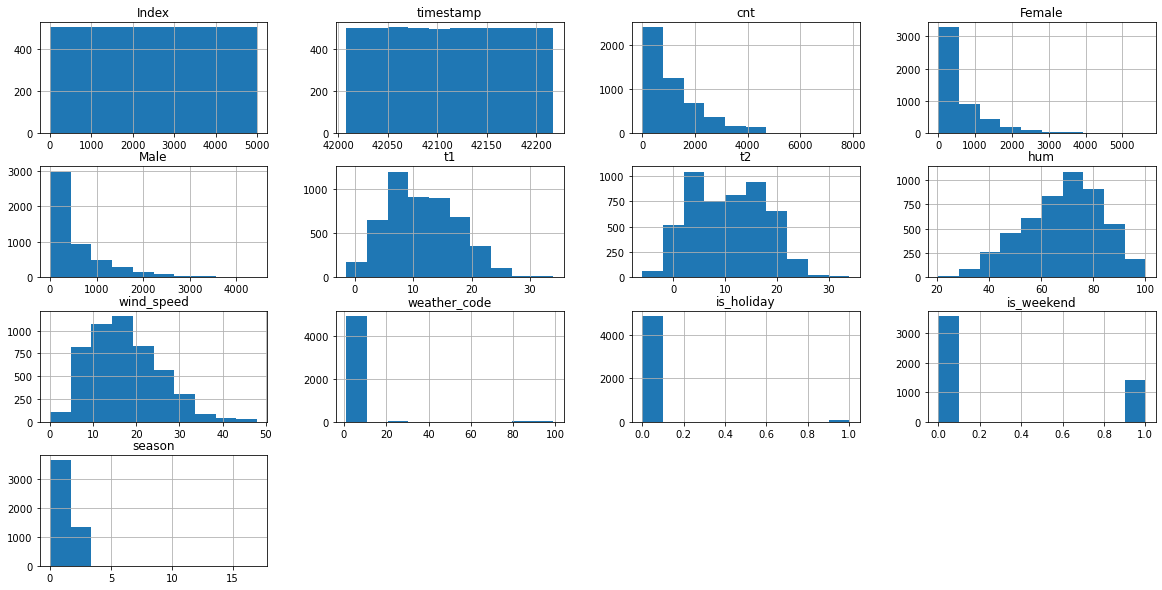

In [9]:
# Plotting the data for numerical columns for checking the distribution and skewness
graph=London_bike_share.select_dtypes(include=["float","int64"])
graph.hist(figsize=(20,10))
plt.show()

# Inferences regarding data distribution

# 1. The categorical columns in the dataset are - "is_holiday", "is_weekend","weather_code" & "season". So we are not infering anything from the skew of these columns
# 2. The temparature related columns "t1", "t2" having actual and "feels like" temperature respectively are having near to normal distribution as these are continous variables.
# 3 .The count column 'cnt' and wind speed column "wind_speed" are having right skewedness.
# 4. The humidity column "hum" is skewed-left. This is understandable as london is generally warm and not humid throughout the year

# Box plots for humidity, weather code, season and count

C:\Users\HP\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='hum'>

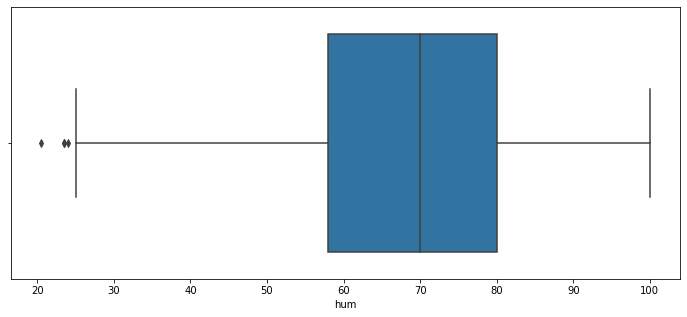

In [10]:
# Let's do the boxplot for the 'hum' data to understand if there are any outliers 
fig , ax = plt.subplots(figsize=(12,5))
sns.boxplot(London_bike_share['hum'])

# Few outliers present under the area of values under 40 for humidity

# Univariate analysis ( target attribute 'cnt')

C:\Users\HP\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='cnt'>

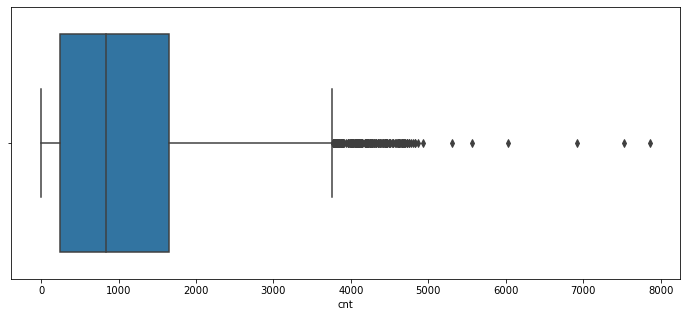

In [11]:
# Let's do the boxplot for the 'cnt' data to understand if there are any outliers 
fig , ax = plt.subplots(figsize=(12,5))
sns.boxplot(London_bike_share['cnt'])

# We can see that there are some outliers above the counts of 4000. 
# But all of them are not outliers because there can be days when more people show up for bike sharing and only few extreme values needs to be removed from 'cnt' 

C:\Users\HP\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='weather_code'>

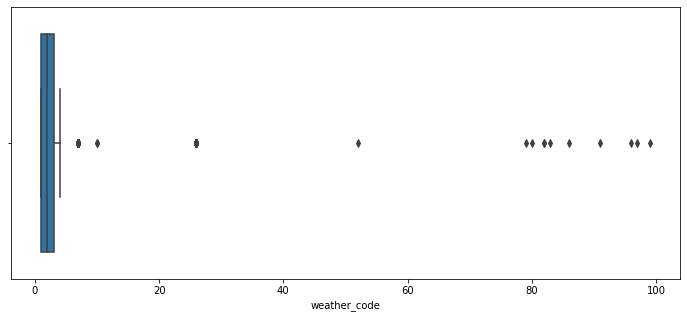

In [12]:
# Let's do the boxplot for the 'weather code' data to understand if there are any outliers 
fig , ax = plt.subplots(figsize=(12,5))
sns.boxplot(London_bike_share['weather_code'])

# According to the box plot, the values 7,10 and 26 are shown as outliers for weather code 
# But we won't consider them as outliers since these are mentioned as valid weather codes in the metadata descriptions
# Therefore we won't drop these values from the dataset

C:\Users\HP\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='season'>

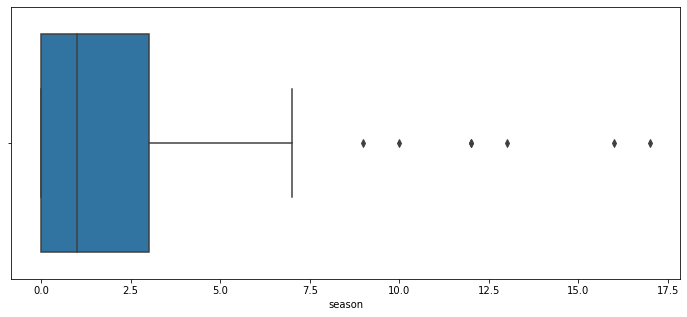

In [13]:
# Let's boxplot the 'season' column to identify the outliers 
fig , ax = plt.subplots(figsize=(12,5))
sns.boxplot(London_bike_share['season'])

# The entire data for 'season' is held between the range 0-3.
# This makes sense since the metadata says the season can have values 0,1,2 & 3 representing spring,summer,fall and winter repectively.
# There are no outliers for "season" column and therefore no dropping of values .

# Let's create a general function to remove outliers for a dataframe

In [551]:
# function for removing outliers
def remove_outliers(dataframe, column):
  q3 = dataframe[column].quantile(0.75)
  q1 = dataframe[column].quantile(0.25)
  IQR = q3 - q1
  upper = q3 + (1.5 * IQR)
  lower = q1 - (1.5 * IQR)
  dataframe = dataframe[(dataframe[column] > lower ) & (dataframe[column] < upper)]
  return dataframe

# Since outliers are present in count and humidity we'll remove them using quantile method

In [552]:
# Remove the outlier values for cnt,humidity
London_bike_share = remove_outliers(London_bike_share,'cnt')
London_bike_share = remove_outliers(London_bike_share,'hum')

In [638]:
London_bike_share.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16647 entries, 0 to 17413
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   timestamp     16647 non-null  datetime64[ns]
 1   cnt           16647 non-null  int64         
 2   t1            16647 non-null  float64       
 3   t2            16647 non-null  float64       
 4   hum           16647 non-null  float64       
 5   wind_speed    16647 non-null  float64       
 6   weather_code  16647 non-null  float64       
 7   is_holiday    16647 non-null  float64       
 8   is_weekend    16647 non-null  float64       
 9   season        16647 non-null  float64       
 10  year          16647 non-null  int64         
 11  month         16647 non-null  int64         
 12  hour          16647 non-null  int64         
dtypes: datetime64[ns](1), float64(8), int64(4)
memory usage: 1.8 MB


C:\Users\MY BOOK\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='cnt'>

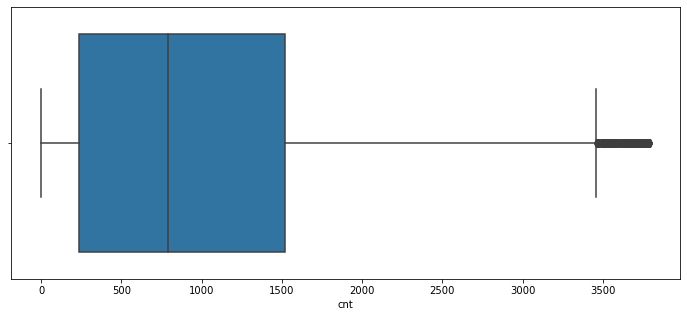

In [639]:
# Let's do the boxplot for the 'cnt' data after dropping outliers 
fig , ax = plt.subplots(figsize=(12,5))
sns.boxplot(London_bike_share['cnt'])

# Let's understand that the data in the right end does not point to outliers as these can be the increase in count of rideshares in favourable weather conditions and we need not delete the data represented by those

C:\Users\MY BOOK\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='hum'>

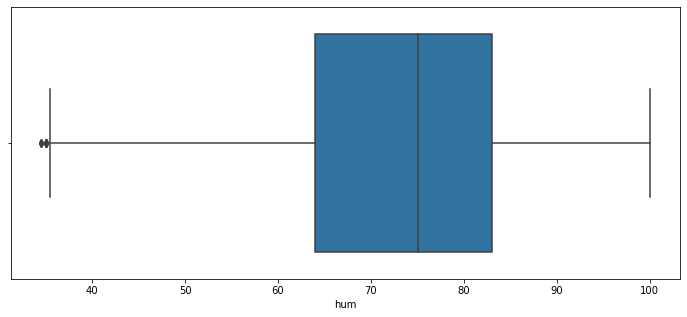

In [649]:
# Let's do the boxplot for the 'hum' data to understand if there are any outliers after deleting them
fig , ax = plt.subplots(figsize=(12,5))
sns.boxplot(London_bike_share['hum'])

# The extreme low humidity data is not removed yet and let it remain as there can be days where humidity can be low although rarely

In [275]:
# But let's check if these belongs to the actual values for weather codes mentioned in the metadata description
sorted ( London_bike_share['weather_code'].unique() )

[1, 2, 3, 4, 7, 10, 26]

In [276]:
# The values that exists for weather_code in the dataset after removing the outliers are 1,2,3,4,7,10 and 26 
# which are all having valid descriptions as mentioned in the metadata 

In [591]:
# let's check if the value belongs to the actual values for 'season' mentioned in the metadata description
sorted ( London_bike_share['season'].unique() )

[0.0, 1.0, 2.0, 3.0]

In [ ]:
# The values for season that remains after removing outliers are 0,1,2 & 3 which have valid metadata descriptions.

# 2.3 Feature reduction

In [642]:
# Checking the dataset after removing outliers from the columns
London_bike_share.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16647 entries, 0 to 17413
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   timestamp     16647 non-null  datetime64[ns]
 1   cnt           16647 non-null  int64         
 2   t1            16647 non-null  float64       
 3   t2            16647 non-null  float64       
 4   hum           16647 non-null  float64       
 5   wind_speed    16647 non-null  float64       
 6   weather_code  16647 non-null  float64       
 7   is_holiday    16647 non-null  float64       
 8   is_weekend    16647 non-null  float64       
 9   season        16647 non-null  float64       
 10  year          16647 non-null  int64         
 11  month         16647 non-null  int64         
 12  hour          16647 non-null  int64         
dtypes: datetime64[ns](1), float64(8), int64(4)
memory usage: 1.8 MB


In [613]:
London_bike_share.describe()

,cnt,t1,t2,hum,wind_speed,weather_code,is_holiday,is_weekend,season,year,month,hour
count,16647.000000,16647.000000,16647.000000,16647.000000,16647.000000,16647.000000,16647.000000,16647.000000,16647.000000,16647.000000,16647.000000,16647.00000
mean,1007.807112,12.242586,11.270579,72.946342,15.886021,2.769868,0.023067,0.294768,1.509101,2015.507239,6.487836,11.44921
std,884.615325,5.440624,6.509499,13.787052,7.944541,2.373780,0.150122,0.455952,1.128060,0.508540,3.494157,6.99978
min,0.000000,-1.500000,-6.000000,34.500000,0.000000,1.000000,0.000000,0.000000,0.000000,2015.000000,1.000000,0.00000
25%,233.000000,8.000000,6.000000,64.000000,10.000000,1.000000,0.000000,0.000000,0.000000,2015.000000,3.000000,5.00000
50%,793.000000,12.000000,12.000000,75.000000,15.000000,2.000000,0.000000,0.000000,2.000000,2016.000000,6.000000,11.00000
75%,1522.500000,16.000000,16.000000,83.000000,20.500000,3.000000,0.000000,1.000000,3.000000,2016.000000,10.000000,18.00000
max,3793.000000,33.500000,33.500000,100.000000,56.500000,26.000000,1.000000,1.000000,3.000000,2017.000000,12.000000,23.00000


<AxesSubplot:>

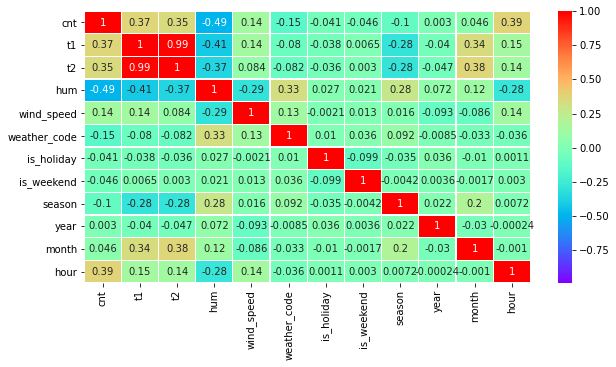

In [614]:
# Create the heat map between the correlation between each columns in the dataset
London_bike_corr = London_bike_share.corr()
plt.subplots(figsize=(10,5))
sns.heatmap(London_bike_corr,vmin=-0.99,vmax=1,annot=True,linewidth=0.2,cmap='rainbow')

# The columns t1 and t2 have a corr coefficient of 0.99 and one of them can be dropped.


In [643]:
# Let's drop 't1' 
London_bike_data_reqd_cols = London_bike_share.drop(['t1'],axis=1)

# 2.4 Feature Engineering

In [644]:
# Let's divide the timestamp into "year" "month" and "hour" and save them as separate columns

London_bike_share['timestamp'] = pd.to_datetime(London_bike_share['timestamp'], format = '%Y%m%d %H:%M:%S')
London_bike_share['year'] = London_bike_share['timestamp'].dt.year
London_bike_share['month'] = London_bike_share['timestamp'].dt.month
London_bike_share['hour'] = London_bike_share['timestamp'].dt.hour

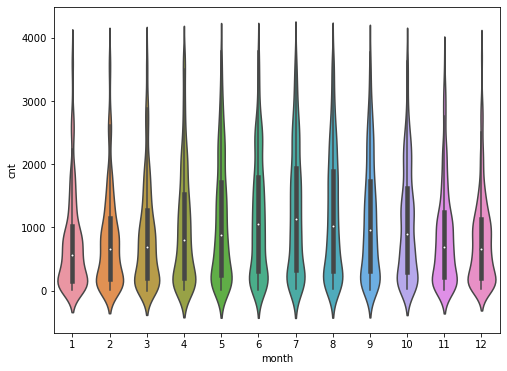

In [646]:
# Let's see which month is the popular for bike sharing using violin plot.

plt.figure(figsize = (8,6))
sns.violinplot(x = London_bike_share['month'] , y = 'cnt', data = London_bike_share);

# We can see from the violin plot that the months June, july and august (6,7 and 8) are having higher counts . 
# So these months being warm, are more popular for ride sharing 

# 3. Exploratory analysis

# Multivariate analysis ( The effect of Weather conditions (weather_code and season) on number of bike shares )

In [594]:
# Let's create a separate dataframe showing counts of riders in different weather conditions
LBS_Weather = London_bike_share.groupby(['weather_code'])['cnt'].sum().reset_index()

In [595]:
# Let's see the weather description for each of the weather codes
LBS_Weather['Weather_Description'] = ["Clear","Scattered Clouds","Broken Clouds","Cloudy","Light shower","Thunderstorm","Snowfall"]

In [596]:
LBS_Weather

,weather_code,cnt,Weather_Description
0,1.0,5490529,Clear
1,2.0,5143657,Scattered Clouds
2,3.0,3754052,Broken Clouds
3,4.0,891653,Cloudy
4,7.0,1473855,Light shower
5,10.0,8168,Thunderstorm
6,26.0,15051,Snowfall


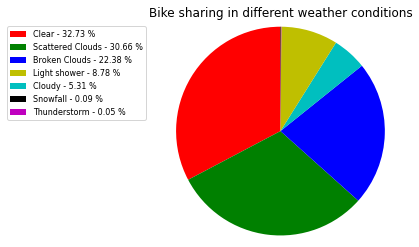

In [597]:
# Pie plot for showing Bike sharing popularity in different weather conditions
weather_data = LBS_Weather["Weather_Description"]
cnt_data = LBS_Weather["cnt"]
colors = ["r","g","b","c","y","m","k"]
porcent = 100.*cnt_data/cnt_data.sum()
patches, texts = plt.pie(cnt_data, colors=colors, startangle=90, radius=1.2)
labels = ['{0} - {1:1.2f} %'.format(i,j) for i,j in zip(weather_data, porcent)]
sort_legend = True
if sort_legend:
    patches, labels, dummy =  zip(*sorted(zip(patches, labels, cnt_data),
                                          key=lambda weather_data: weather_data[2],
                                          reverse=True))
plt.title("Bike sharing in different weather conditions")
plt.legend(patches, labels, loc='best', bbox_to_anchor=(-0.1, 1.),
           fontsize=8)
plt.savefig('piechart.png', bbox_inches='tight')

# The pie plot is self explanatory. But we can easily conclude that a clear or a partially cloudy weather attracts more bike-sharing than extreme weather conditions like rain or snowfall as expected

In [599]:
# Similarly let's create the data to see the number of riders in each of the seasons
LBS_Season = London_bike_share.groupby(['season'])['cnt'].sum().reset_index()

In [600]:
LBS_Season['season_description'] = ["Spring","Summer","Fall","Winter"]

In [601]:
# Let's add the season descriptions
LBS_Season

,season,cnt,season_description
0,0.0,4221932,Spring
1,1.0,4915080,Summer
2,2.0,4234791,Fall
3,3.0,3405162,Winter


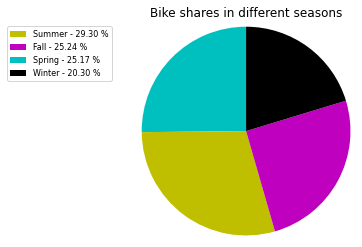

In [602]:
# Pie plot for showing the percentage of riders in each of the seasons
season_data = LBS_Season["season_description"]
cnt_data = LBS_Season["cnt"]
colors = ["c","y","m","k"]
porcent = 100.*cnt_data/cnt_data.sum()
patches, texts = plt.pie(cnt_data, colors=colors, startangle=90, radius=1.2)
labels = ['{0} - {1:1.2f} %'.format(i,j) for i,j in zip(season_data, porcent)]
sort_legend = True
if sort_legend:
    patches, labels, dummy =  zip(*sorted(zip(patches, labels, cnt_data),
                                          key=lambda season_data: season_data[2],
                                          reverse=True))
plt.title("Bike shares in different seasons")
plt.legend(patches, labels, loc='best', bbox_to_anchor=(-0.1, 1.),
           fontsize=8)
plt.savefig('piechart.png', bbox_inches='tight')

# We can see that the summer is the most popular season for Bike sharing (29.38%). Spring and Fall are almost equally popular seasons amongs bike sharers. 
# The least favourable season for bike-sharing is winter as expected

In [603]:
# Similarly let's create the data to see the number of riders in holiday / non holiday
LBS_Holiday = London_bike_share.groupby(['is_holiday'])['cnt'].sum().reset_index()

In [604]:
LBS_Holiday['Holiday-NonHoliday'] = ["Non-holiday","Holiday"]

In [605]:
LBS_Holiday

,is_holiday,cnt,Holiday-NonHoliday
0,0.0,16481467,Non-holiday
1,1.0,295498,Holiday


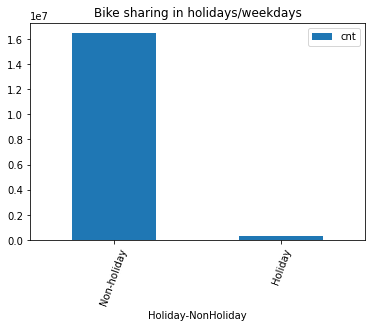

In [606]:
# Plot of riders in holidays v/s weekends
import matplotlib.pyplot as plot 
# Draw a vertical bar chart
LBS_Holiday.plot.bar(x="Holiday-NonHoliday", y="cnt", rot=70, title="Bike sharing in holidays/weekdays");
plot.show(block=True);

# Bikesharing is popular in Non-holidays (working days) and not so popular on holidays

In [608]:
# Similarly let's create the data to see the number of riders in weekend / weekday
LBS_weekend = London_bike_share.groupby(['is_weekend'])['cnt'].sum().reset_index()

In [609]:
# Let's add the description for "is_weekend" column
LBS_weekend['weekend/weekday'] = ["weekday","weekend"]

In [610]:
LBS_weekend.groupby(['weekend/weekday'])['cnt'].sum()

weekend/weekday
weekday    12141652
weekend     4635313
Name: cnt, dtype: int64

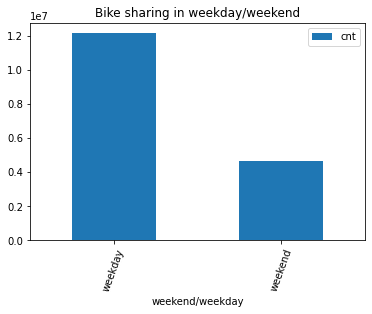

In [611]:
# Plot of riders in weekdays v/s weekends
import matplotlib.pyplot as plot 
# Draw a vertical bar chart
LBS_weekend.plot.bar(x="weekend/weekday", y="cnt", rot=70, title="Bike sharing in weekday/weekend");
plot.show(block=True);

# As expected, ride sharing is popular in weekday ( working day) than weekends 

# Modelling

In [618]:
# Checking the final dataset prior to modelling
London_bike_data_reqd_cols.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16647 entries, 0 to 17413
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   cnt           16647 non-null  int64  
 1   t2            16647 non-null  float64
 2   hum           16647 non-null  float64
 3   wind_speed    16647 non-null  float64
 4   weather_code  16647 non-null  float64
 5   is_holiday    16647 non-null  float64
 6   is_weekend    16647 non-null  float64
 7   season        16647 non-null  float64
 8   year          16647 non-null  int64  
 9   month         16647 non-null  int64  
 10  hour          16647 non-null  int64  
dtypes: float64(7), int64(4)
memory usage: 1.5 MB


# Model preparation

In [620]:
# Do the imports of necessary functions
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
# Seperate the data into dependent and independent variables
X = London_bike_data_reqd_cols.drop('cnt',axis=1)
y = London_bike_data_reqd_cols['cnt']
# Using standard scaling 
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X1 = scaler.fit_transform(X)
X = pd.DataFrame(data = X1, columns = X.columns)

In [621]:
# Define testing and training dataset
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.10, random_state= 42)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((14982, 10), (1665, 10), (14982,), (1665,))

# Trying linear regression Model

In [622]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, r2_score, mean_squared_log_error, mean_squared_error, make_scorer

lr = LinearRegression(normalize = True)
lr.fit(X_train, y_train)

LinearRegression(normalize=True)

In [623]:
lr.score(X_test, y_test)

0.32001615779336257

In [624]:
prediction_LR = lr.predict(X_test)

In [625]:
prediction_LR

array([ 374.20172556,  175.65156793,   62.38987154, ..., 1013.82540385,
       1392.79937792, 1130.68230812])

In [626]:
rmse_LR = np.sqrt(mean_squared_error(y_test, prediction_LR))
print("RMSE for Linear regression: %f" % (rmse_LR))

mae_LR = mean_absolute_error(y_test, prediction_LR)
print("Mean absolute error for liner regression: %f" % (mae_LR))

RMSE for Linear regression: 738.603241
Mean absolute error for liner regression: 545.397987


In [627]:
actual = pd.DataFrame(data = y_test.values, columns = ["actual"])
predicted_LR = pd.DataFrame(data = prediction_LR, columns = ["predicted"])

final = pd.concat([actual, predicted_LR], axis = 1)
final

,actual,predicted
0,542,374.201726
1,78,175.651568
2,520,62.389872
3,671,1241.139371
4,146,209.439444
...,...,...
1660,1039,364.230471
1661,2036,269.306225
1662,1007,1013.825404
1663,659,1392.799378


# Root mean square value for Linear regression model is high (around 750). So let's try other models as well

# Trying K Nearest neighbours model

In [628]:
# K-Nearest Neighbours
from sklearn.neighbors import KNeighborsClassifier

classifier = KNeighborsClassifier(n_neighbors=60)
classifier.fit(X_train, y_train)

y_pred_KNN = classifier.predict(X_test)

# Summary of the predictions made by the classifier
#print(classification_report(y_test, y_pred_KNN))
#print(confusion_matrix(y_test, y_pred_KNN))
# Accuracy score
from sklearn.metrics import accuracy_score
print('accuracy for KNN model in predicting the Count of bikeshare is : - ',accuracy_score(y_pred_KNN,y_test))

accuracy for KNN model in predicting the Count of bikeshare is : -  0.0012012012012012011


# Accuracy for KNN is very close to 0 and cannot be used for predicting the ride share counts 

# Trying the decision tree algorithm for predictions

In [647]:
# Decision Tree's
from sklearn.tree import DecisionTreeClassifier

classifier = DecisionTreeClassifier()

classifier.fit(X_train, y_train)

y_pred_DT = classifier.predict(X_test)

# Summary of the predictions made by the classifier
#print(classification_report(y_test, y_pred_DT))
#print(confusion_matrix(y_test, y_pred_DT))
# Accuracy score
from sklearn.metrics import accuracy_score
print('accuracy for Decision tree model in predicting the Ride share count is : -  ',accuracy_score(y_pred_DT,y_test))

accuracy for Decision tree model in predicting the Ride share count is : -   0.0018018018018018018


# Accuracy for decision tree is very close to 0 as well and cannot be used for predicting the ride share counts

# Let's try the XGB Regressor algorithm and check the prediction

In [630]:
from xgboost.sklearn import XGBRegressor

In [631]:
xgbmodel = XGBRegressor()
xgbmodel.fit(X_train, y_train)

preds = xgbmodel.predict(X_test)
print("Score", xgbmodel.score(X_test, y_test))

Score 0.9521424261208368


In [632]:
actual = pd.DataFrame(data = y_test.values, columns = ["actual"])
predicted_xgb = pd.DataFrame(data = preds, columns = ["predicted"])

final = pd.concat([actual, predicted_xgb], axis = 1)
final

,actual,predicted
0,542,493.121643
1,78,7.624784
2,520,488.409271
3,671,671.729187
4,146,134.747543
...,...,...
1660,1039,1122.580078
1661,2036,2083.189941
1662,1007,1186.150635
1663,659,715.453674


# The score for XGB is 0.952 which is quite good and we can see that the predicted values are very close to the actuals

# XGB Model fine tuning

# Let's use the 99% of the data for training and rest 1% for testing and see if it improves the accuracy

In [648]:
# Define model parameters
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.01, random_state= 42)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

xgbmodel = XGBRegressor()
xgbmodel.fit(X_train, y_train)

preds = xgbmodel.predict(X_test)
print("Score after fine tuning", xgbmodel.score(X_test, y_test))

Score after fine tuning 0.9589807907645056


# After fine tuning, the score for XGB model improved from 0.952 to 0.958 . So, if we add more data for training over time, we can improve the prediction of count sharing using XGB regression model itself  

# Submitted by Aneesh Akramannil, Harikrishnan Bhuvanendran, Viswaraj Chandran & Rahna Babu